# 0.0. Imports

## 0.1. Libraries

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 0.2. Data

In [226]:
df = pd.read_csv('zomato.csv')

## 0.3. Helper Functions

In [6]:
def country(data):
    countries = {1: "India",
                 14: "Australia",
                 30: "Brazil",
                 37: "Canada",
                 94: "Indonesia",
                 148: "New Zeland",
                 162: "Philippines",
                 166: "Qatar",
                 184: "Singapure",
                 189: "South Africa",
                 191: "Sri Lanka",
                 208: "Turkey",
                 214: "United Arab Emirates",
                 215: "England",
                 216: "United States of America"}
    data['Country'] = data['Country Code'].map(countries)
    data.drop(columns='Country Code', inplace=True)
    return data

In [251]:
def price_range(data):
    price = {1: "Cheap",
             2: "Moderate",
             3: "Expensive",
             4: "Gourmet"}
    data['Price range'] = data['Price range'].map(price)
    return data

In [7]:
def convert_to_dolar(data):
    currency = {'Botswana Pula(P)': 0.076,
                'Brazilian Real(R$)': 0.19,
                'Dollar($)': 1,
                'Emirati Diram(AED)': 0.27,
                'Indian Rupees(Rs.)': 0.012,
                'Indonesian Rupiah(IDR)': 0.000065,
                'NewZealand($)': 0.61,
                'Pounds(Â£)': 1.20,
                'Qatari Rial(QR)': 0.27,
                'Rand(R)': 0.055,
                'Sri Lankan Rupee(LKR)': 0.0031,
                'Turkish Lira(TL)': 0.059}
    data['Average Cost for two'] = data['Average Cost for two']*data['Currency'].map(currency)
    data.drop(columns='Currency', inplace=True)
    return data

In [8]:
def true_false(data):
    data['Has Table booking'] = data['Has Table booking'].apply(lambda x: True if x==0 else False)
    data['Has Online delivery'] = data['Has Online delivery'].apply(lambda x: True if x==1 else False)
    data ['Is delivering now'] = data['Is delivering now'].apply(lambda x: True if x==0 else False)
    data['Switch to order menu'] = data['Switch to order menu'].apply(lambda x: True if x==0 else False)
    return data

In [9]:
def color_name(data):
    colors = {"3F7E00": "darkgreen",
              "5BA829": "green",
              "9ACD32": "lightgreen",
              "CDD614": "orange",
              "FFBA00": "red",
              "CBCBC8": "gray",
              "FF7800": "darkred"}
    data['Rating color'] = data['Rating color'].map(colors)
    return data

In [247]:
def drop_cols(data):
    data.drop(columns=['Address','Locality','Locality Verbose','Switch to order menu'], inplace=True)
    return data

In [252]:
def preprocessing(data):
    data = country(data)
    data = convert_to_dolar(data)
    data = true_false(data)
    data = color_name(data)
    data = price_range(data)
    data["Cuisines"] = data["Cuisines"].apply(lambda x: x.split(",")[0])
    data.drop_duplicates(inplace=True)
    return data

# 1.0. Data Description

In [253]:
df1 = df.copy()

In [38]:
df1.head()

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Rating Color
0,6310675,Mama Lou's Italian Kitchen,Las Piñas City,121.009787,14.447615,Italian,83.6,False,False,True,True,3,4.6,3F7E00,Excellent,619,Philippines,darkgreen
1,6310675,Mama Lou's Italian Kitchen,Las Piñas City,121.009787,14.447615,Italian,83.6,False,False,True,True,3,4.6,3F7E00,Excellent,619,Philippines,darkgreen
2,6314542,Blackbird,Makati City,121.024562,14.556042,"European, Asian",235.6,True,False,True,True,4,4.7,3F7E00,Excellent,469,Philippines,darkgreen
3,6301293,Banapple,Makati City,121.023171,14.556196,"Filipino, American, Italian, Bakery",60.8,True,False,True,True,3,4.4,5BA829,Very Good,867,Philippines,green
4,6315689,Bad Bird,Makati City,121.027708,14.565899,American,53.2,True,False,True,True,3,4.4,5BA829,Very Good,858,Philippines,green


## 1.1. NaN's

In [58]:
df1.isna().sum()

Restaurant ID             0
Restaurant Name           0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude                 0
Latitude                  0
Cuisines                 15
Average Cost for two    437
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Switch to order menu      0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
Country                   0
Rating Color              0
dtype: int64

In [254]:
df1.dropna(inplace=True)

## 1.2. Dimensions

In [231]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 7512
Number of Cols: 21


## 1.3. Preprocessing

In [255]:
df1 = preprocessing(df1)

## 1.4. Types

In [46]:
df1.dtypes

Restaurant ID             int64
Restaurant Name          object
City                     object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Has Table booking          bool
Has Online delivery        bool
Is delivering now          bool
Switch to order menu       bool
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
Rating Color             object
dtype: object

## 1.5. Descriptive Statistics

In [256]:
numerical_values = df1.select_dtypes( include=['int64', 'float64'] )
categorical_values = df1.select_dtypes( exclude=['int64', 'float64'] )

In [257]:
numerical_values.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
count,6.929000e+03,6929.000000,6929.000000,6.529000e+03,6929.000000,6929.000000
mean,1.074958e+07,31.450097,19.415699,3.857017e+03,4.131116,605.359071
std,7.038381e+06,79.034287,23.517259,3.093973e+05,0.662287,1116.539143
min,5.490000e+02,-122.700455,-41.330428,0.000000e+00,0.000000,0.000000
25%,3.600066e+06,-43.224875,12.897099,6.000000e+00,4.000000,151.000000
50%,7.900139e+06,73.757794,25.266663,1.440000e+01,4.200000,328.000000
75%,1.714686e+07,79.832321,32.749369,3.500000e+01,4.500000,650.000000
max,1.904028e+07,175.310552,55.976980,2.500002e+07,4.900000,41333.000000


# 2.0. Filtering Variables

In [258]:
df2 = df1.copy()

## 2.1. Lines

In [259]:
lines = (df2['Average Cost for two']>=2) & (df2['Average Cost for two']<50000)
df2 = df2.loc[lines,:]

## 2.2. Columns

In [260]:
df2 = drop_cols(df2)

In [326]:
df2.to_csv('zomato_final.csv', index = False)

# 3.0. Analysis

In [261]:
df3 = df2.copy()

## 3.1. General

How many registered restaurants are there?

How many registered countries are there?

How many registered cities are there?

How many votes were made?

How many different cuisines are there?

In [238]:
print("There are {} restaurants registered".format(df3['Restaurant Name'].nunique()))

There are 5433 restaurants registered


In [239]:
print("There are {} countries registered".format(df3['Country'].nunique()))

There are 14 countries registered


In [240]:
print("There are {} cities registered".format(df3['City'].nunique()))

There are 120 cities registered


In [241]:
print("{} Votes were made".format(df3['Votes'].sum()))

4122840 Votes were made


In [242]:
print("There are {} different types of cuisine registered".format(df3['Cuisines'].nunique()))

There are 161 different types of cuisine registered


## 3.2. Countries

Which country has more cities registered?

In [276]:
df_aux = df3.loc[:,['Country','City']].groupby('Country').nunique().sort_values('City',ascending=False).reset_index()
df_aux

,Country,City
0,India,49
1,United States of America,22
2,Philippines,12
3,South Africa,12
4,New Zeland,4
5,United Arab Emirates,4
6,Australia,3
7,Brazil,3
8,Canada,3
9,Indonesia,3


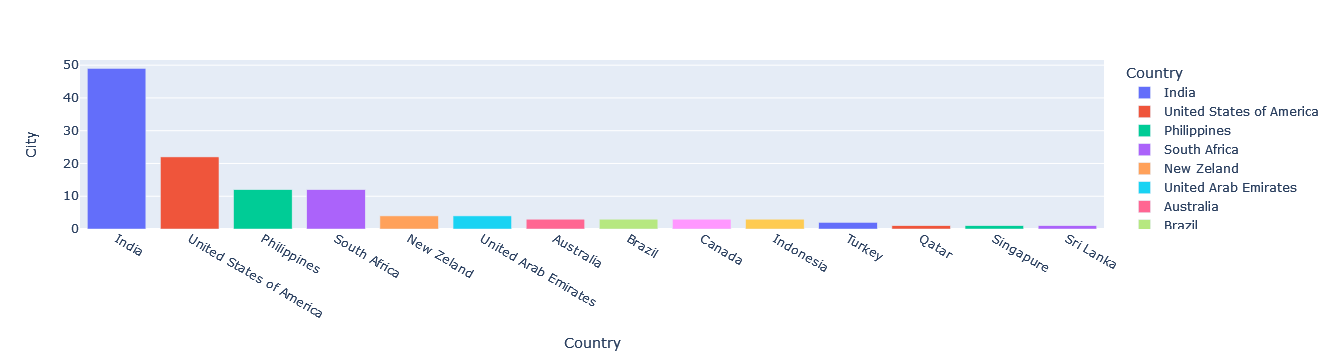

In [279]:
px.bar(df_aux, x='Country', y='City', color='Country')

In [162]:
print("The country with more cities registered is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more cities registered is India: 49


Which country has more restaurants registered?

In [280]:
df_aux = df3.loc[:,['Country','Restaurant ID']].groupby('Country').count().sort_values('Restaurant ID',ascending=False).reset_index()
df_aux

,Country,Restaurant ID
0,India,3033
1,United States of America,1365
2,South Africa,341
3,United Arab Emirates,294
4,New Zeland,235
5,Brazil,234
6,Canada,177
7,Australia,176
8,Turkey,155
9,Indonesia,80


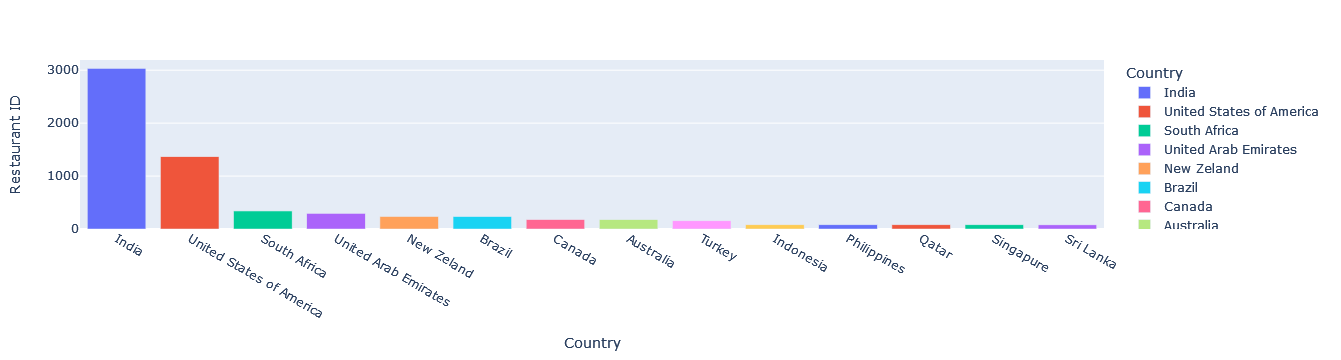

In [281]:
px.bar(df_aux, x='Country', y='Restaurant ID', color='Country')

In [165]:
print("The country with more restaurants registered is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more restaurants registered is India: 3413


Which country has more restaurants with price range of 4?

In [290]:
df_aux = df3.loc[df3['Price range']=='Gourmet',['Country','Restaurant ID']].groupby('Country').count().sort_values('Restaurant ID',ascending=False).reset_index()
df_aux

,Country,Restaurant ID
0,United States of America,415
1,South Africa,221
2,India,195
3,Brazil,148
4,United Arab Emirates,102
5,New Zeland,79
6,Turkey,59
7,Singapure,58
8,Canada,54
9,Qatar,50


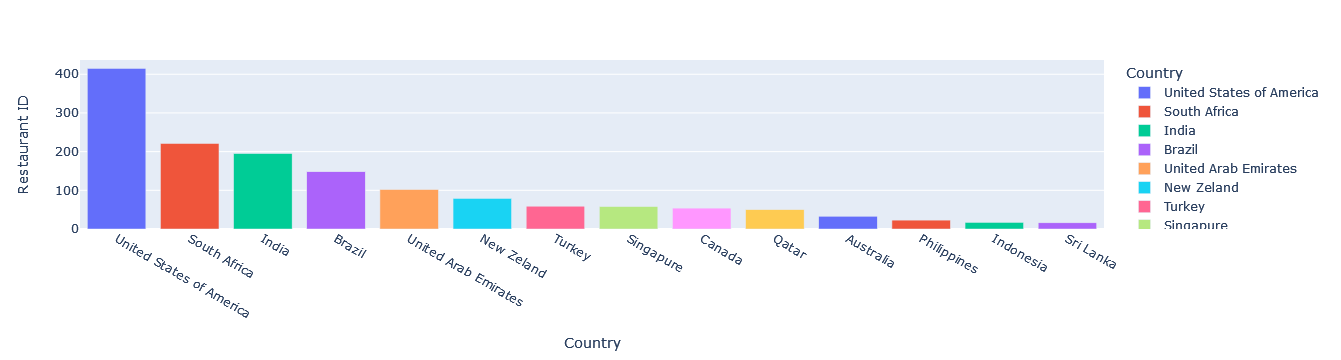

In [291]:
px.bar(df_aux, x='Country', y='Restaurant ID', color='Country')

In [174]:
print("The country with more restaurants with price range of 4 is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more restaurants with price range of 4 is United States of America: 418


Which country has more types of cuisines?

In [292]:
df_aux = df3.loc[:,['Country','Cuisines']].groupby("Country").nunique().sort_values("Cuisines", ascending=False).reset_index()
df_aux

,Country,Cuisines
0,India,76
1,United States of America,73
2,United Arab Emirates,46
3,Australia,42
4,Brazil,42
5,Canada,42
6,South Africa,42
7,New Zeland,37
8,Qatar,31
9,Turkey,28


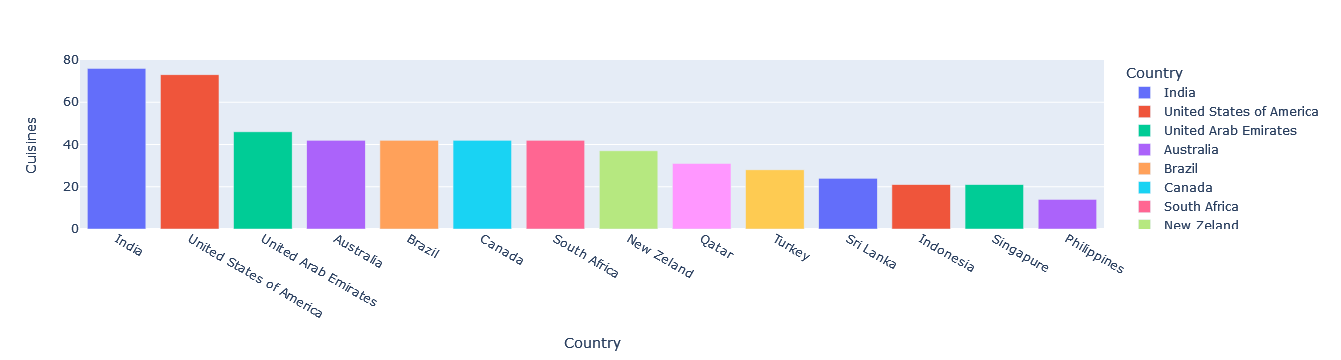

In [293]:
px.bar(df_aux, x='Country', y='Cuisines', color='Country')

In [176]:
print("The country with more types of cuisines registered is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more types of cuisines registered is India: 76


Which country has more votes?

In [295]:
df_aux = df3.loc[:,['Country','Votes']].groupby("Country").sum ().sort_values("Votes", ascending=False).reset_index()
df_aux

,Country,Votes
0,India,2775921
1,United States of America,520379
2,United Arab Emirates,177445
3,Australia,128609
4,Canada,103607
5,Turkey,98916
6,Indonesia,89026
7,South Africa,81484
8,New Zeland,52275
9,Philippines,48398


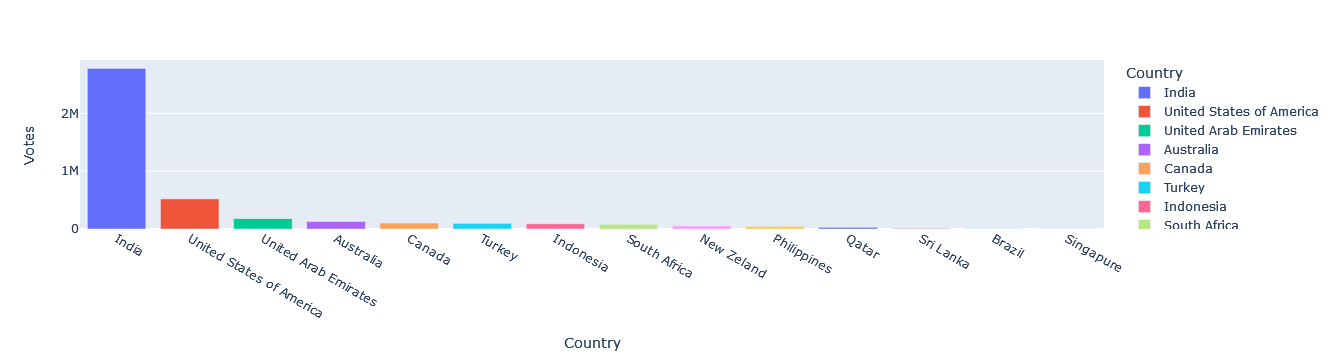

In [296]:
px.bar(df_aux, x='Country', y='Votes', color='Country')

In [178]:
print("The country with more votes registered is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more votes registered is India: 3149160


Which country has more restaurants that deliver?

In [297]:
df_aux = df3.loc[(df3['Has Online delivery']==True) & (df3['Is delivering now']==True),['Country','Restaurant ID']].groupby("Country").count().sort_values("Restaurant ID", ascending=False).reset_index()
df_aux

,Country,Restaurant ID
0,India,1012
1,United Arab Emirates,153
2,Qatar,34
3,Philippines,2


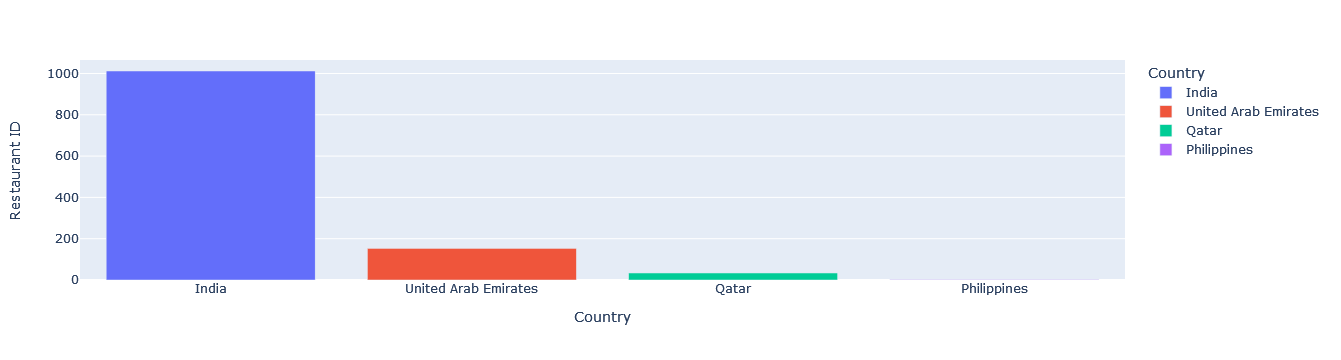

In [298]:
px.bar(df_aux, x='Country', y='Restaurant ID', color='Country')

In [181]:
print("The country with more restaurants with online delivery or that are delivering now is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more restaurants with online delivery or that are delivering now is India: 1102


Which country has more restaurants with table booking?

In [299]:
df_aux = df3.loc[df3['Has Table booking']==True,['Country','Restaurant ID']].groupby("Country").count().sort_values("Restaurant ID", ascending=False).reset_index()
df_aux

,Country,Restaurant ID
0,India,2777
1,United States of America,1362
2,South Africa,338
3,United Arab Emirates,284
4,Brazil,234
5,New Zeland,216
6,Canada,177
7,Turkey,151
8,Australia,148
9,Singapure,80


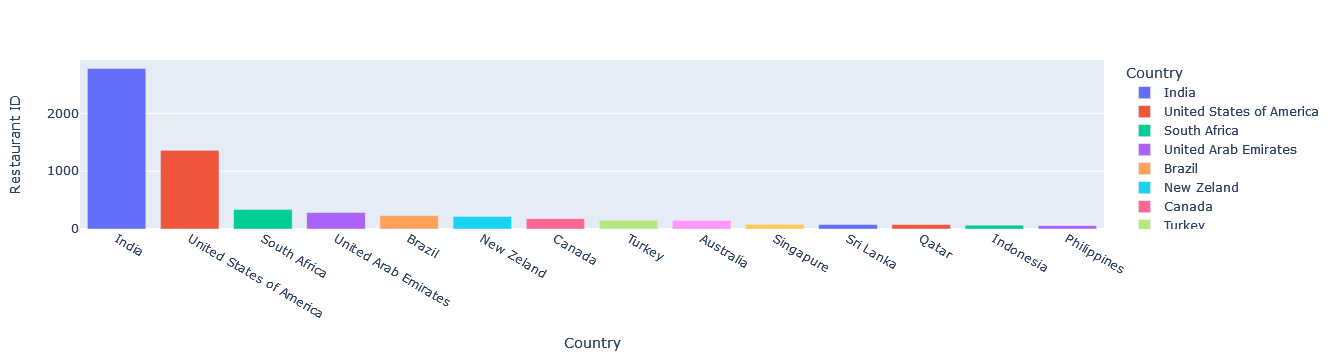

In [300]:
px.bar(df_aux, x='Country', y='Restaurant ID', color='Country')

In [184]:
print("The country with more restaurants with table booking is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with more restaurants with table booking is India: 3122


Which country has the highest average aggregate rating?

In [301]:
df_aux = df3.loc[:,['Country','Aggregate rating']].groupby("Country").mean().sort_values("Aggregate rating", ascending=False).reset_index()
df_aux

,Country,Aggregate rating
0,Indonesia,4.601250
1,Philippines,4.463750
2,Singapure,4.435000
3,United States of America,4.404176
4,Australia,4.369886
5,Canada,4.321469
6,Turkey,4.314839
7,Qatar,4.240000
8,New Zeland,4.161277
9,South Africa,4.064516


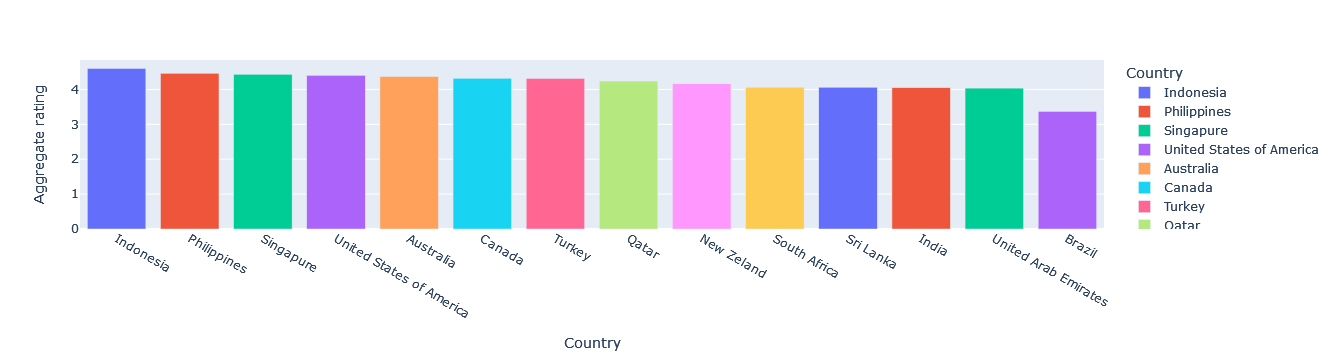

In [302]:
px.bar(df_aux, x='Country', y='Aggregate rating', color='Country')

In [187]:
print("The country with the highest aggregate rating is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The country with the highest aggregate rating is Indonesia: 4.6


Which country has the lowest average aggregate rating?

In [191]:
print("The country with the lowest aggregate rating is {}: {}".format(df_aux.iloc[-1,0], round(df_aux.iloc[-1,1],2)))

The country with the lowest aggregate rating is Brazil: 3.39


What is the average cost of a dish for two in each country?

In [303]:
df_aux = df3.loc[:,['Country','Average Cost for two']].groupby("Country").mean().sort_values("Average Cost for two", ascending=False).reset_index()
df_aux

,Country,Average Cost for two
0,Singapure,141.437500
1,Philippines,93.314700
2,Australia,72.409091
3,United States of America,55.392674
4,Qatar,46.980000
5,Canada,42.570621
6,United Arab Emirates,42.350510
7,New Zeland,38.559787
8,Brazil,27.050641
9,Indonesia,19.695000


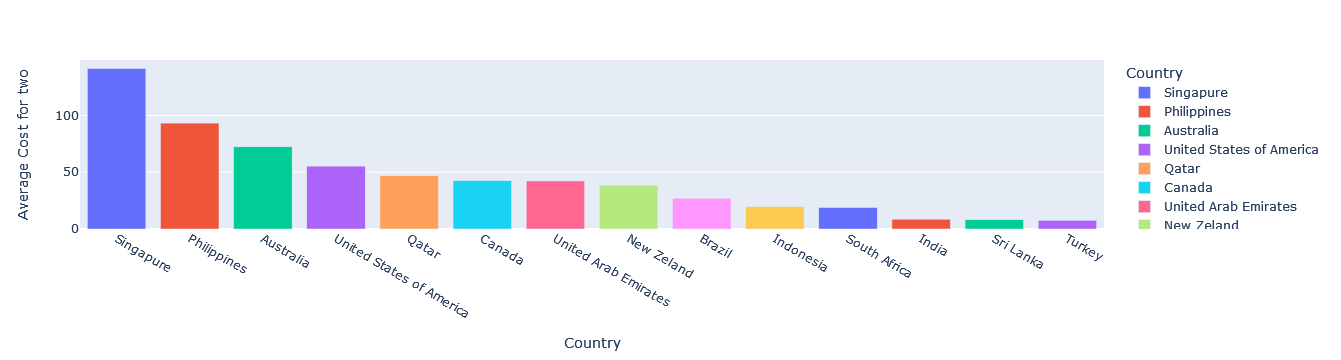

In [304]:
px.bar(df_aux, x='Country', y='Average Cost for two', color='Country')

## 3.3. Cities

Which city has more restaurants registered?

In [305]:
df_aux = df3.loc[:,['City','Restaurant ID']].groupby('City').count().sort_values('Restaurant ID',ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Abu Dhabi,80
1,Pune,80
2,Doha,80
3,Dallas,80
4,Coimbatore,80
...,...,...
115,Johannesburg South,1
116,Ghaziabad,1
117,Gandhinagar,1
118,Zirakpur,1


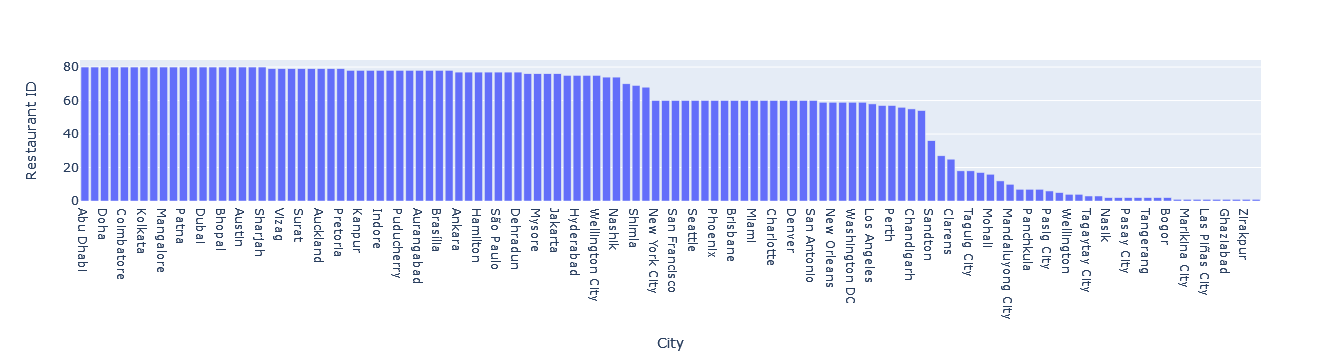

In [307]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [195]:
print("The city with more restaurants registered is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurants registered is Nagpur: 96


Which city has more restaurants with aggregate rating higher than 4?

In [308]:
df_aux = df3.loc[df3['Aggregate rating']>4,['City','Restaurant ID']].groupby("City").count().sort_values('Restaurant ID', ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Bangalore,79
1,Jakarta,74
2,Auckland,72
3,Chennai,72
4,Houston,71
...,...,...
111,Marikina City,1
112,Muntinlupa City,1
113,Gandhinagar,1
114,Zirakpur,1


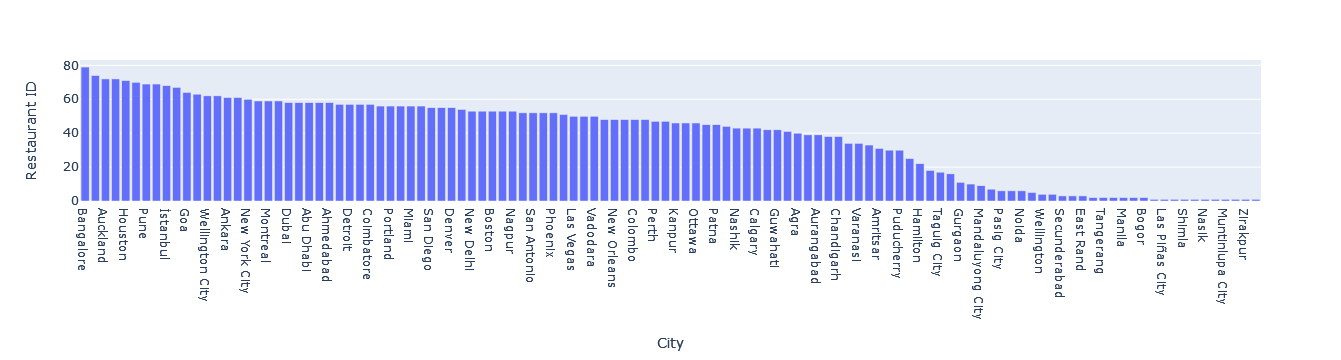

In [309]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [198]:
print("The city with more restaurants with rating higher than 4 is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurants with rating higher than 4 is Bangalore: 86


Which city has more restaurants with aggregate rating lower than 2?

In [310]:
df_aux = df3.loc[df3['Aggregate rating']<2,['City','Restaurant ID']].groupby("City").count().sort_values('Restaurant ID', ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Gangtok,30
1,Ooty,15
2,Brasília,14
3,São Paulo,13
4,Rio de Janeiro,10
5,Clarens,4


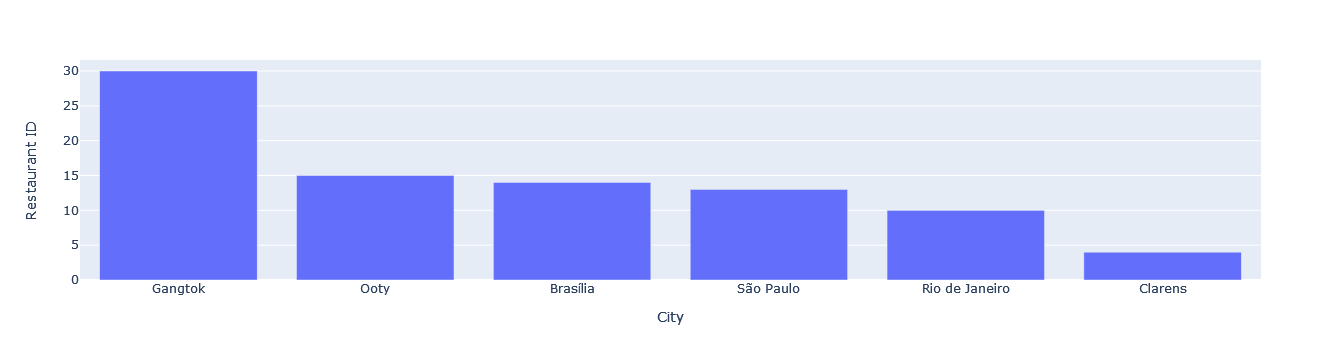

In [311]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [200]:
print("The city with more restaurants with rating lower than 2 is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurants with rating lower than 2 is Gangtok: 35


Which city has the highest average cost for dish for two?

In [312]:
df_aux = df3.loc[:,['City','Average Cost for two']].groupby("City").mean().sort_values('Average Cost for two', ascending=False).reset_index()
df_aux

,City,Average Cost for two
0,Pasay City,304.000000
1,Singapore,141.437500
2,New York City,101.500000
3,Tagaytay City,101.333333
4,Makati City,99.470588
...,...,...
115,Bhubaneshwar,6.045570
116,Aurangabad,5.753846
117,Bhopal,5.317500
118,Ankara,5.260195


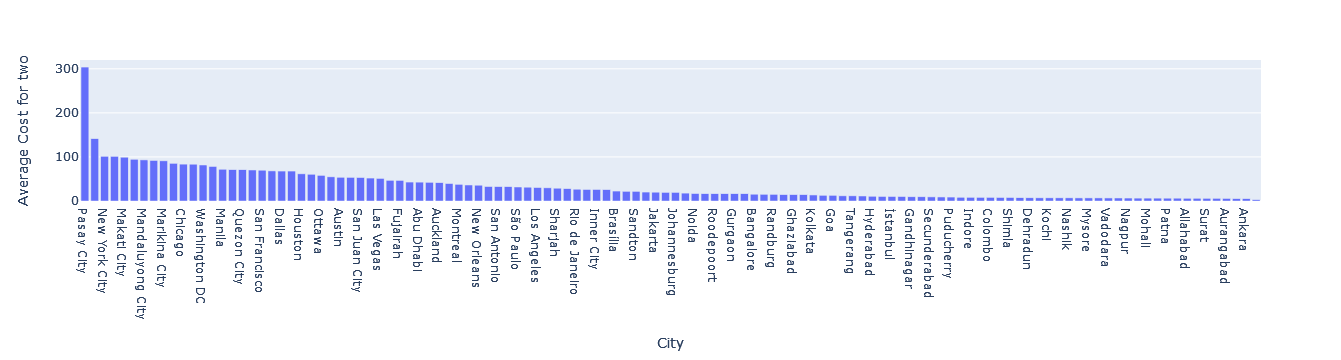

In [315]:
px.bar(df_aux, x='City', y='Average Cost for two')

In [202]:
print("The city with the highest average cost for a dish for two is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with the highest average cost for a dish for two is Pasay City: 304.0


Which city has more types of cuisines?

In [316]:
df_aux = df3.loc[:,['City','Cuisines']].groupby("City").nunique().sort_values("Cuisines", ascending=False).reset_index()
df_aux

,City,Cuisines
0,Doha,31
1,Montreal,30
2,Philadelphia,29
3,São Paulo,29
4,Houston,29
...,...,...
115,Johannesburg South,1
116,Ghaziabad,1
117,Gandhinagar,1
118,Zirakpur,1


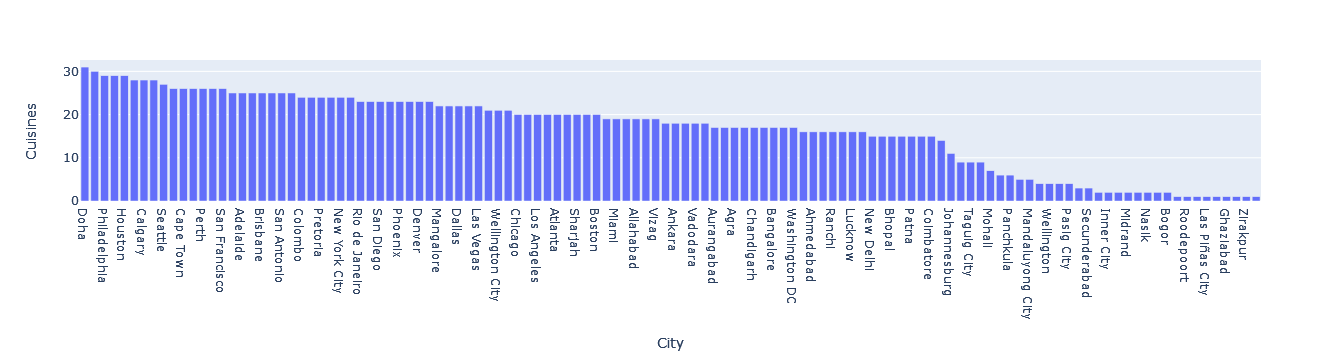

In [317]:
px.bar(df_aux, x='City', y='Cuisines')

In [204]:
print("The city with more types of cuisines is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more types of cuisines is Doha: 31


Which city has more restaurants tha have table booking

In [318]:
df_aux = df3.loc[df3['Has Table booking']==True,['City','Restaurant ID']].groupby("City").count().sort_values("Restaurant ID", ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Austin,80
1,Dallas,80
2,Bhopal,80
3,Sharjah,80
4,Singapore,80
...,...,...
114,Marikina City,1
115,Muntinlupa City,1
116,San Juan City,1
117,Bogor,1


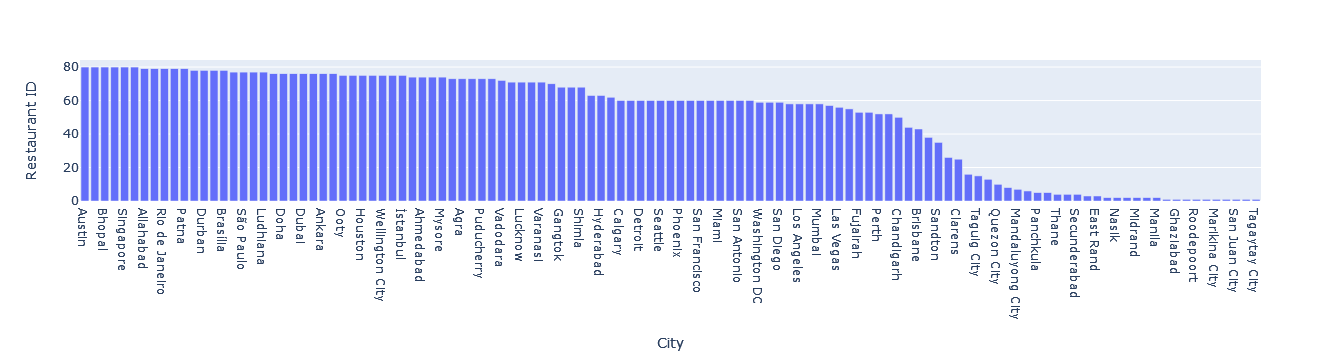

In [319]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [207]:
print("The city with more restaurant that have table booking is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurant that have table booking is Nagpur: 94


Which city has more restaurants that deliver?

In [320]:
df_aux = df3.loc[(df3['Has Online delivery']==True) & (df3['Is delivering now']==True),['City','Restaurant ID']].groupby("City").count().sort_values("Restaurant ID", ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Sharjah,57
1,Dubai,51
2,Kolkata,46
3,Abu Dhabi,45
4,Hyderabad,43
5,Chennai,43
6,Patna,40
7,Coimbatore,40
8,Kochi,39
9,Allahabad,37


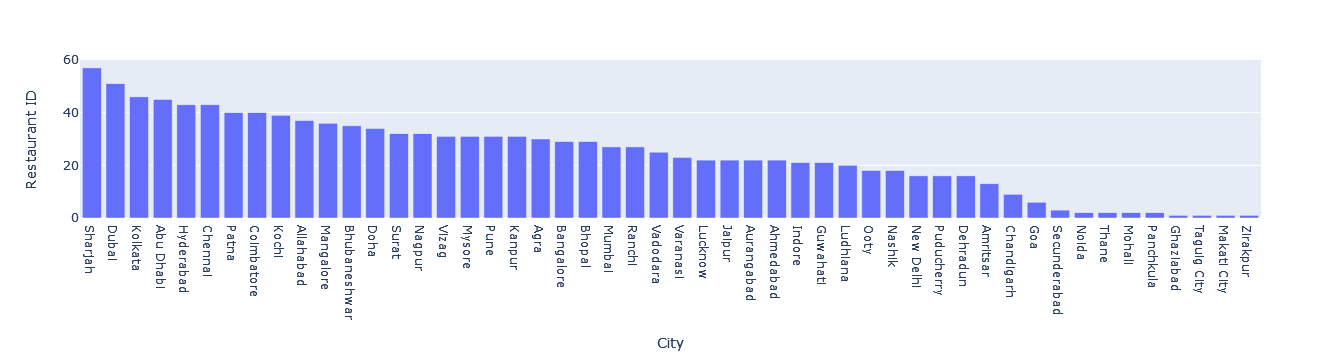

In [321]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [211]:
print("The city with more restaurants that deliver is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurants that deliver is Abu Dhabi: 86


Which city has more restaurants that have online delivery?

In [322]:
df_aux = df3.loc[(df3['Has Online delivery']==True),['City','Restaurant ID']].groupby("City").count().sort_values("Restaurant ID", ascending=False).reset_index()
df_aux

,City,Restaurant ID
0,Bhopal,75
1,Abu Dhabi,71
2,Sharjah,71
3,Vadodara,70
4,Patna,69
5,Ranchi,68
6,Coimbatore,68
7,Aurangabad,68
8,Allahabad,68
9,Nagpur,67


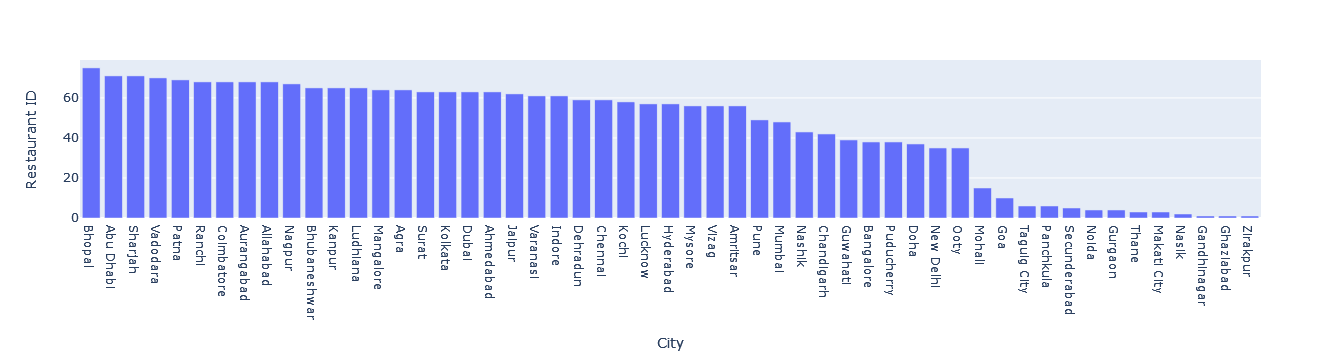

In [323]:
px.bar(df_aux, x='City', y='Restaurant ID')

In [212]:
print("The city with more restaurants that has online delivery is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The city with more restaurants that has online delivery is Abu Dhabi: 86


## 3.4. Restaurants

Which restaurant has more votes?

In [324]:
df_aux = df3.loc[:,['Restaurant Name','Votes']].sort_values('Votes', ascending=False)
df_aux

,Restaurant Name,Votes
3928,Bawarchi,41333
3038,Byg Brewski Brewing Company,17394
2986,Toit,15270
3002,Truffles,14984
5076,Hauz Khas Social,13627
...,...,...
335,Tempero das Gerais,0
338,Vinheria Santa Clara,0
285,Cantinho da Gula,0
5116,Madras Rasoi,0


In [216]:
print("The restaurant with more votes is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The restaurant with more votes is Bawarchi: 41333


Which restaurant has the highest aggregate rating?

In [325]:
df_aux = df3.loc[:,['Restaurant Name','Aggregate rating']].sort_values('Aggregate rating', ascending=False)
df_aux

,Restaurant Name,Aggregate rating
6179,The Sugar Club,4.9
1293,Food Shack,4.9
681,The Himalayan,4.9
191,Churrascaria Palace,4.9
6132,Miann,4.9
...,...,...
3583,Chullah,0.0
5165,Kabab Corner,0.0
5164,Hotel Sanjay Tharavadu,0.0
5163,Hotel Pushpa,0.0


In [218]:
print("The restaurant with the highest rating is {}: {}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The restaurant with the highest rating is Meraki The Coffee House: 4.9


Which restaurant has the highest cost for a dish for two?

In [219]:
df_aux = df3.loc[:,['Restaurant Name','Average Cost for two']].sort_values('Average Cost for two', ascending=False)
df_aux

,Restaurant Name,Average Cost for two
2121,Corner House,755.000
1468,Eleven Madison Park,650.000
1450,Per Se,600.000
798,Alinea,600.000
2061,Restaurant Andre,500.000
...,...,...
7384,Papazın Bağı,2.360
7424,Boğaziçi Lokantası,2.360
7430,Turta Home Cafe,2.065
7410,Cici Piknik,2.065


In [221]:
print("The restaurant with the highest cost for a dish for two is {}: ${}".format(df_aux.iloc[0,0], df_aux.iloc[0,1]))

The restaurant with the highest cost for a dish for two is Corner House: $755.0


Are the restaurantes that have online delivery  on average the ones with more votes?

In [225]:
df_aux = df3.loc[:,['Votes','Has Online delivery']].groupby("Has Online delivery").mean().reset_index()
df_aux

,Has Online delivery,Votes
0,False,539.464688
1,True,853.110042
